# PS2: Logistic regression

In this problem set, you will experiment with binary classification using logistic regression.

To start with, let's load the "digits" data set from scikit-learn:

In [2]:
import sklearn
import numpy
from sklearn.datasets import load_digits

digits = load_digits(2)  # Load just the first two classes, 0 and 1
#print(digits.DESCR)
print(digits.data.shape) # (360, 64)

import matplotlib.pyplot as plt 
plt.gray()
plt.matshow(digits.images[0])
plt.show()

(360, 64)


Next, let's gather an equal number of 0's and 1's:

In [3]:
zeros = digits.data[digits.target==0,:]
ones = digits.data[digits.target==1,:]
ones = ones[0:178,:]

print(zeros.shape)
print(ones.shape)

(178, 64)
(178, 64)


## Question 1

Write Python code to create a matrix and vector X_train, y_train containing the first 148 records from each set and X_test, y_test containing the remaining 30 records from each set.

In [4]:
zero_train = zeros[0:148,:]
one_train = ones[0:148,:]

zero_test = zeros[148:,:]
one_test = ones[148:,:]

X_train = numpy.concatenate([zero_train, one_train])
X_train = numpy.concatenate([numpy.matrix(numpy.ones(296)).transpose(), X_train],1)

y_train = numpy.matrix(numpy.concatenate([numpy.zeros(148), numpy.ones(148)])).transpose()

X_test = numpy.concatenate([zero_test, one_test])
X_test = numpy.concatenate([numpy.matrix(numpy.ones(60)).transpose(), X_test],1)

y_test = numpy.matrix(numpy.concatenate([numpy.zeros(30), numpy.ones(30)])).transpose()

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (296, 65)
y_train: (296, 1)
X_test: (60, 65)
y_test: (60, 1)


## Question 2

The parameter vector $\theta$ consists of an intercept $\theta_0$ and 64 weights $\theta_1 \ldots \theta_{64}$ for each of the pixels in the input image. Initialize $\theta$ to a random normal 0-mean vector, then perform 20 iterations of stochastic gradient descent. On each iteration through the data set, you should randomize the order of presentation of the inputs. Experiment with different initial weights and different values for the learning rate, and plot the classification accuracy and log likelihood on the test and train sets as a function of iteration.

Iter 0: train accuracy 0.79 test accuracy 0.78
Iter 1: train accuracy 0.92 test accuracy 0.83
Iter 2: train accuracy 0.95 test accuracy 0.83
Iter 3: train accuracy 0.97 test accuracy 0.85
Iter 4: train accuracy 0.97 test accuracy 0.85
Iter 5: train accuracy 0.97 test accuracy 0.85
Iter 6: train accuracy 0.98 test accuracy 0.85
Iter 7: train accuracy 0.98 test accuracy 0.85
Iter 8: train accuracy 0.98 test accuracy 0.85
Iter 9: train accuracy 0.98 test accuracy 0.87
Iter 10: train accuracy 0.99 test accuracy 0.85
Iter 11: train accuracy 0.98 test accuracy 0.85
Iter 12: train accuracy 0.99 test accuracy 0.85
Iter 13: train accuracy 0.99 test accuracy 0.87
Iter 14: train accuracy 0.99 test accuracy 0.87
Iter 15: train accuracy 0.99 test accuracy 0.88
Iter 16: train accuracy 1.00 test accuracy 0.88
Iter 17: train accuracy 1.00 test accuracy 0.88
Iter 18: train accuracy 1.00 test accuracy 0.88
Iter 19: train accuracy 1.00 test accuracy 0.88


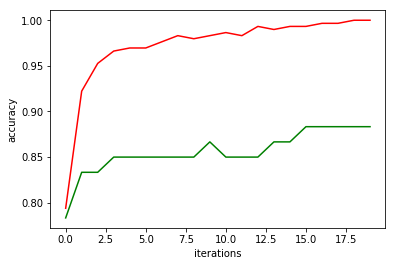

red: train
green: test


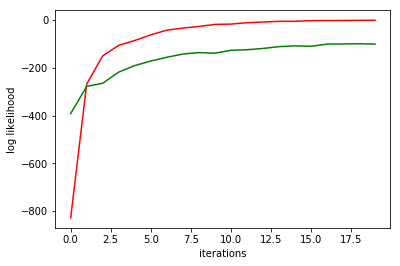

red: train
green: test


In [5]:
theta = numpy.matrix(numpy.random.normal(0, 1, (65,1))).transpose()
alpha = 0.001
train_acc = numpy.zeros(20)
test_acc = numpy.zeros(20)
log_likelihood_train = numpy.zeros(20)
log_likelihood_test = numpy.zeros(20)

def h(theta, x):
    thresholdedExp = numpy.exp(-numpy.dot(theta, x))
    thresholdedExp[thresholdedExp<1e-6] = 1e-6
    ret = 1/(1+thresholdedExp)
    return ret

for iter in range(0,20):
    ### Training #################################################################
    order = numpy.random.permutation(range(0,296))
    num_corr = 0
    
    l = 0.0;
    log_likelihood_elements = []
    for pattern in range(0,len(y_train)):
        i = order[pattern]
        x = X_train[i,:]
        y = y_train[i]
        y_pred = h(theta, x.transpose())
        if (1 == float(y) and  y_pred >= 0.5) or (0 == float(y) and y_pred < 0.5):
            num_corr += 1
        theta = theta + alpha * (y - y_pred) * x
        
        l = float(y*numpy.log(y_pred) + (1 - y)*numpy.log(1-y_pred))
        log_likelihood_elements.append(l)
        
    # Calculate accuracy over train set
    train_acc[iter] = num_corr / 296
    
    # Calculate log likelyhood for train set
    log_likelihood_train[iter] = (numpy.sum(log_likelihood_elements))
   
    ### Testing ##################################################################
    m = len(y_test)
    num_corr = 0
    l = 0.0;
    log_likelihood_elements = []
    for i in range(0, m):
        x = X_test[i,:]
        y = y_test[i]
        y_pred = h(theta, x.transpose())
        if (1 == float(y) and  y_pred >= 0.5) or (0 == float(y) and y_pred < 0.5):
            num_corr += 1
                
        l = float(y*numpy.log(y_pred) + (1 - y)*numpy.log(1-y_pred))
        log_likelihood_elements.append(l)
    # Calculate accuracy over test set
    test_acc[iter] = num_corr / 60
    
    # Calculate log likelyhood for train set
    log_likelihood_test[iter] = (numpy.sum(log_likelihood_elements))
    
    ### Print accuracy
    print('Iter %d: train accuracy %.2f test accuracy %.2f' % (iter, train_acc[iter], test_acc[iter]))

# Plot training and test accuracy as a function of iteration
plt.plot(range(20), train_acc,'red')
plt.plot(range(20), test_acc, 'green')
plt.xlabel("iterations")
plt.ylabel('accuracy')
plt.show()
print("red: train\ngreen: test")

# Plot training and test log likelihood as a function of iteration
plt.plot(range(20), log_likelihood_train,'red')
plt.plot(range(20), log_likelihood_test,'green')
plt.xlabel("iterations")
plt.ylabel('log likelihood')
plt.show()
print("red: train\ngreen: test")

## Question 3

Discuss your experiments with different initial weights and different learning rates and comment on whether you observed overfitting and underfitting in the experiment.

### Answer 3
All experiments are done over 20 iterations with randomly distributed weights ($\pmb{\theta}$).

With a learning rate of <b>0.001</b>, the training accuracy nearly always hits 100% while test accuracy usually ranges from 92% to 97%, but does reach the occasional 100%. The test accuracy also seems to peak and plateau at around 5 to 10 iterations, although some times it seems to oscillate around this range and stablizes at around 15 iterations.

With a higher learning rate of <b>0.1</b>, the training accuracy is <b>always</b> hitting 100% accuracy and test accuracy rarely seems to not go under 97% and almost always hits 100%. Further more, both the training accuracy and testing accuracy are peaking and plateauing in only about 1 to 3 iterations. 

Overfitting and underfitting were not observed in either cases.

## Question 4

In the Newton-Raphson method, rather than climbing the gradient of the log likelihood function, we jump to where $\nabla_\ell(\theta)$ would be 0 if $\nabla_\ell(\theta)$ was in fact a linear function.

This requires computing the Hessian $$\mathtt{H}_\ell(\theta) = \begin{bmatrix} \frac{\partial^2}{\partial\theta_0\partial\theta_0}\ell(\theta) & \cdots \\ \vdots & \ddots \end{bmatrix} $$ of the log likelihood function and inverting it.

Give an expression for $\frac{\partial^2}{\partial\theta_i\partial\theta_j}\ell(\theta)$ for logistic regression here:

$\frac{\partial^2}{\partial\theta_i\partial\theta_j}\ell(\theta) = ...$

To be invertible, $\mathtt{H}_\ell(\theta)$ must be full rank. Under what conditions might this not be true?

## Question 5

Next, let's experiment with Newton's method. In the cell below, implement batch Newton update. Experiment with stopping criteria (log likelihood, accuracy) and try to get the best test set accuracy.

(65, 1)


/media/storage/college/ML/env/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)
(65, 1)


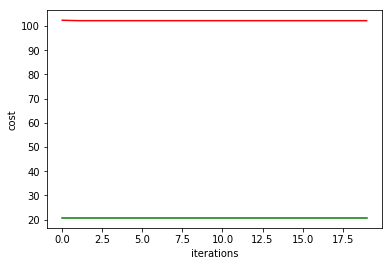

red: train
green: test


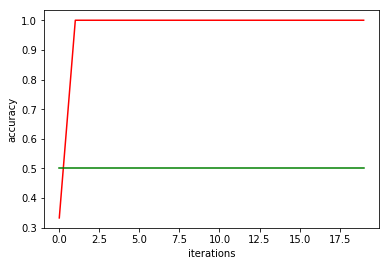

red: train
green: test


In [7]:
def hessian_inverse(theta, X):
    m = len(X[:,0]) # size of data set
    hessian = numpy.zeros(shape = (65, 65))
    for i in range(0, m):
        hessian += ( 
            float( h(theta, X[i,:].transpose()) * (1-h(theta, X[i,:].transpose())) )
                * (X[i,:].transpose() * X[i,:])
        )
    hessianInverse = numpy.linalg.pinv(hessian)
    return hessianInverse

def log_likelihood(X, Y, y_guess):
    y_guess[y_guess<1e-6] = 1e-6 #thresholding the y_guess values
    term1 = float(Y.transpose() * numpy.log(y_guess))
    term2 = float((1 - Y).transpose() * (numpy.log(1 - y_guess)))
    return term1 + term2

# Generate random initial theta's
theta = numpy.matrix(numpy.random.normal(0, 1, (65,1)))

train_ll = [] # log likelihood for training set
test_ll = [] # log likelihood for testing set

max_iterations = 20
iterations = 0
accuracy_train = []
accuracy_test = []
for i in range(0, max_iterations):
    iterations += 1
    ### Training ##########################################################
    y_guess_train = h(theta.transpose(), X_train.transpose()).transpose()
    error = (y_train - y_guess_train)
    
    # Update weights
    gradient = (error.transpose()*X_train).transpose()
    theta = theta - hessian_inverse(theta.transpose(), X_train) * gradient
    print(gradient.shape)
#     theta = theta - alpha*gradient
     
    ### Testing ###########################################################
    y_guess_test = h(theta.transpose(), X_test.transpose()).transpose()
    
    ### Calculating Log-Likelihoods of test and train sets ################
    train_ll.append(log_likelihood(X_train, y_train, y_guess_train))
    test_ll.append(log_likelihood(X_test, y_test, y_guess_test))
    
    ### Calculating accuracy ##############################################
    # Accuracy for Training set
    correct_count = 0.0
    guesses = numpy.array(y_guess_train)
    guesses[guesses<0.5] = 0
    guesses[guesses>=0.5] = 1
    for j in range(m):
        if guesses[j] == y_train[j]:
            correct_count += 1
    accuracy_train.append(correct_count / m)
    
    # Accuracy for Test set
    correct_count = 0.0
    guesses = numpy.array(y_guess_test)
    guesses[guesses<0.5] = 0
    guesses[guesses>=0.5] = 1
    for j in range(m):
        if guesses[j] == y_test[j]:
            correct_count += 1
    accuracy_test.append(correct_count / len(y_test))
    
    ### Stopping Criteria #################################################
    if i > 1:
        if (test_ll[i] < test_ll[i-1] and accuracy_test[i] >= 0.4):
            iterations = iterations
            train_ll = train_ll[0:iterations]
            test_ll = test_ll[0:iterations]
            break

# Plot training cost as a function of iteration
plt.plot(range(iterations), -numpy.array(train_ll)/len(train_ll),'red')
plt.plot(range(iterations), -numpy.array(test_ll)/len(test_ll),'green')
plt.xlabel("iterations")
plt.ylabel('cost')
plt.show()
print("red: train\ngreen: test")

# Plot accuracy and iterations
plt.plot(range(iterations), accuracy_train,'red')
plt.plot(range(iterations), accuracy_test,'green')
plt.xlabel("iterations")
plt.ylabel('accuracy')
plt.show()
print("red: train\ngreen: test")

## Question 6

Discuss your experiments and comment on overfitting and underfitting in the previous exercise.

### Answer 6
All experiments are done over a maximum of 20 iterations and  with randomly distributed starting ($\pmb{\theta}$).
A stopping criteria based on the test data accuracy, where we stop training when the test data accuracy starts dipping when it is over a certain threshold, is used.

As the hessian we are getting is not invertable, we are useing Moore–Penrose inverse of the hessian for updating the weights.

The accuracy is very low for the test data while that of the training data seems to be vary based on the initial values of the weights.

The costs of both the traning and test data are high in almost all cases, which clearly shows that the data is being underfitted.

Overfitting was not observed.

## Question 7

You may get 100% test accuracy with some random initial weight vectors, but probably not every time. Do a brief analysis of the test set errors made by one of the classifiers you built. Do you notice any pattern to the errors?


In [556]:
### Answer 7
print(numpy.concatenate([y_test, guesses],axis=1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]]
